## <b>Importing Libraries</b>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

## <b>Dataset Generation</b>

In [5]:
df = pd.read_csv("C:/Users/TAHSIN/Desktop/mid/csv/data3.csv")
df.head()
df.head(df.shape[0])

,X,Y,LABEL
0,-13,-96,2
1,-42,80,1
2,-41,-21,1
3,-7,-70,2
4,90,-33,4
...,...,...,...
295,-100,17,0
296,-12,-39,2
297,-72,36,0
298,68,-20,4


In [6]:
# A function for 1-hot encoding the output labels

def normalize(input):
  if input == 0:
    return [1, 0, 0, 0, 0]
  elif input == 1:
    return [0, 1, 0, 0, 0]
  elif input == 2:
    return [0, 0, 1, 0, 0]
  elif input == 3:
    return [0, 0, 0, 1, 0]
  elif input == 4:
    return [0, 0, 0, 0, 1]

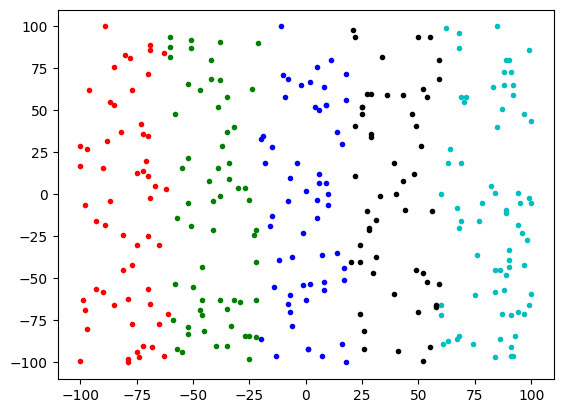

In [7]:
X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["LABEL"].values.tolist()

for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], "r.")
    elif Y[i] == 1:
        plt.plot(X1[i], X2[i], "g.")
    elif Y[i] == 2:
        plt.plot(X1[i], X2[i], "b.")
    elif Y[i] == 3:
        plt.plot(X1[i], X2[i], "k.")
    else:
        plt.plot(X1[i], X2[i], "c.")

In [8]:
# Zips the 2 input features into a list
features = list(zip(X1, X2))              
# Converts the list into a numpy array                  
features_np = np.array(features)                            

In [9]:
# Testing
print(Y)

[2, 1, 1, 2, 4, 3, 2, 4, 4, 3, 1, 4, 3, 1, 2, 2, 0, 2, 4, 2, 0, 0, 0, 2, 3, 1, 4, 2, 0, 0, 0, 1, 1, 3, 2, 1, 4, 3, 4, 2, 3, 1, 2, 2, 1, 0, 0, 3, 4, 4, 1, 4, 0, 0, 1, 1, 4, 4, 2, 2, 4, 1, 0, 2, 4, 2, 4, 4, 4, 0, 4, 2, 4, 3, 4, 2, 4, 0, 1, 1, 3, 4, 1, 3, 4, 2, 2, 3, 4, 0, 0, 4, 2, 2, 0, 1, 0, 2, 4, 4, 3, 3, 1, 4, 4, 4, 1, 0, 1, 3, 3, 1, 0, 4, 3, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0, 2, 1, 2, 4, 1, 4, 0, 0, 1, 3, 2, 1, 1, 4, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2, 1, 4, 2, 0, 2, 3, 2, 4, 2, 2, 4, 3, 2, 4, 3, 3, 0, 0, 4, 0, 4, 0, 0, 0, 2, 3, 1, 3, 3, 1, 4, 4, 3, 3, 3, 2, 4, 2, 3, 3, 1, 0, 3, 2, 2, 2, 0, 0, 3, 1, 2, 1, 3, 4, 1, 3, 3, 4, 3, 0, 4, 3, 4, 1, 3, 3, 4, 1, 2, 4, 4, 1, 4, 2, 4, 1, 3, 0, 0, 4, 0, 4, 4, 1, 2, 1, 3, 1, 1, 0, 2, 3, 1, 1, 0, 3, 0, 4, 2, 1, 1, 4, 0, 1, 2, 0, 3, 0, 2, 1, 4, 3, 3, 2, 4, 4, 1, 0, 3, 0, 2, 1, 2, 3, 2, 0, 3, 3, 2, 4, 4, 3, 1, 1, 0, 0, 1, 1, 4, 3, 4, 4, 4, 4, 2, 0, 2, 0, 4, 2]


In [10]:
# Normalizing the output labels to be one-hot encoded and
# Turning it into a numpy array

Y2 = np.array([normalize(i) for i in Y])

In [11]:
# Dividing the total set into training (200) & testing (100) sets

features_train = features_np[:200]
Y2_train = Y2[:200]

features_test = features_np[200:]
Y2_test = Y2[200:]
# print(features_train)
# print(Y_test)

## <b>Task : 3HL Neural Network</b>

In [12]:
class NeuralNetwork(object):
    def __init__(self, inputLayerNeurons = 2, 
                 hiddenLayer1Neurons = 10, 
                 hiddenLayer2Neurons = 10, 
                 hiddenLayer3Neurons = 10, 
                 outLayerNeurons = 5, 
                 learning_rate = 0.01, 
                 activation_type: str = 'sigmoid'):

        self.activation_type = activation_type
        self.learning_rate = learning_rate

        # random weight initialization
        self.W_IH1 = np.random.randn(inputLayerNeurons, 
                                     hiddenLayer1Neurons)
        
        self.W_H1H2 = np.random.randn(hiddenLayer1Neurons, 
                                      hiddenLayer2Neurons)
        
        self.W_H2H3 = np.random.randn(hiddenLayer2Neurons, 
                                      hiddenLayer3Neurons)
        
        self.W_H3O = np.random.randn(hiddenLayer3Neurons, 
                                     outLayerNeurons)
    


    def activation(self, x, der=False):
        if self.activation_type == 'sigmoid':
            if der == True:
                return x * (1 - x)
            else:
                return 1 / (1 + np.exp(-x))

        if self.activation_type == "tanh":
            if der == True:
                return 1 - (np.tanh(x))**2                      # 1 - (tanh(x))^2
            else:
                return np.tanh(x)

        if self.activation_type == "relu":
            if der == True:
                return np.where(x > 0, 1, 0)
            else:
                return np.maximum(0, x)

        if self.activation_type == "gaussian":
            if der == True:
                return -(2 * x * np.exp(-x**2))                 # -2xe^(-x^2)
            else:
                return np.exp(-x**2)                            # e^(-x^2)


    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_IH1) 
        self.hidden1_output = self.activation(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H1H2)
        self.hidden2_output = self.activation(hidden2_input)

        hidden3_input = np.dot(self.hidden2_output, self.W_H2H3) 
        self.hidden3_output = self.activation(hidden3_input)

        output_input = np.dot(self.hidden3_output, self.W_H3O) 
        pred = self.activation(output_input)
        return pred


    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.activation(pred, der=True)

        hidden3_error = output_delta.dot(self.W_H3O.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.activation(self.hidden3_output, der=True)

        hidden2_error = hidden3_delta.dot(self.W_H2H3.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.activation(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H1H2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.activation(self.hidden1_output, der=True)

        self.W_IH1 += X.T.dot(hidden1_delta)
        self.W_H1H2 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H2H3 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_H3O += self.hidden3_output.T.dot(output_delta)


    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

## <b>Training & Testing</b>

In [13]:
NN = NeuralNetwork(activation_type = 'sigmoid')
# NN = NeuralNetwork(activation_type ='tanh')
# NN = NeuralNetwork(activation_type = 'gaussian')
# NN = NeuralNetwork(activation_type = 'relu')



Epoch: 0, error: 0.21877020279718204


Epoch: 10000, error: 0.09608644644007833
Epoch: 20000, error: 0.08838726186828653
Epoch: 30000, error: 0.08034960390570772
Epoch: 40000, error: 0.07294431085437107
Epoch: 50000, error: 0.06747768433039114
Epoch: 60000, error: 0.06359743537326804
Epoch: 70000, error: 0.06051265811963866
Epoch: 80000, error: 0.0580229551789423
Epoch: 90000, error: 0.05585510723331091


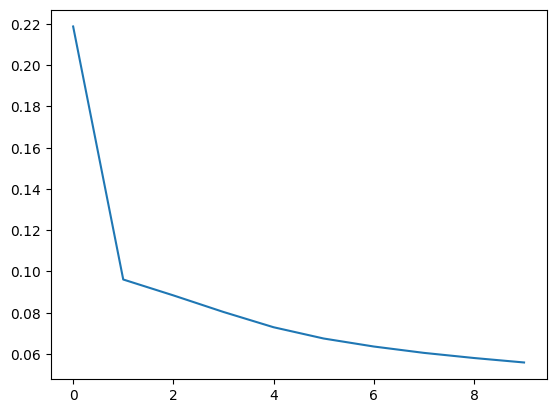

In [14]:
err_list = []

for i in range(100000):
    NN.train(features_train, Y2_train)
    err = np.mean(np.square(Y2_train - NN.feedForward(features_train)))

    if i % 10000 == 0:
      err_list.append(err)
      print(f'Epoch: {i}, error: {err}')

plt.plot(err_list)
plt.show()

## <b>Documenation</b>

#### <b>Modifications made</b>
<p>
1. <code>outLayerNeurons</code> value changed from 1 to 5 for 5 seperate classes. <br>
2. Added <code>hiddenLayer2Neurons</code> and <code>hiddenLayer3Neurons</code> for achieveing 3 HL neural network. <br>
3. Added <code>W1H2</code> and <code>W2H3</code> for handling wights of <code>hiddenLayer2Neurons</code> and <code>hiddenLayer3Neurons</code> <br>
4. Added 3 more activation functions, <code>tanh</code>, <code>reLU</code> & <code>gaussian</code> in which the reLU performed very poorly. <br>
5. In forward propagation <code>hidden2_input</code>, <code>hidden2_output</code>, <code>hidden3_input</code>, <code>hidden3_output</code> were calculated. These were added for the additional 2 hidden layers to the network.
6. In backpropagation <code>hidden3_error</code>, <code>hidden2_error</code>, <code>hidden3_delta</code>, <code>hidden2_delta</code> were calculated. <br>
</p>

## <b>Challenges</b>
<p>
1. Adding 2 additional layers to the model required extra calculations and code to be implemented which proved to be difficult at the time. <br>
2. Biases was added initially to check the performance however it reduced the accuracy in this particular case therefore it was removed. <br>
</p>

In [15]:
# Stores a dict with the probability of each class with its class name

def getProb(pred):
    return {f'Class-{index}': p*100 for index, p in enumerate(pred)}

In [16]:
# Returns the dict key with the highest probablity

def getClass(dict):
  max_key = max(dict, key=dict.get)
  return (max_key)

In [17]:
# Testing a random input

pred = NN.feedForward([75,-33])
print(pred)
print(getProb(pred))
print(getClass(getProb(pred)))

[2.82205334e-05 2.80973294e-10 3.70896503e-10 1.15374021e-01
 8.67531159e-01]
{'Class-0': 0.002822053343056564, 'Class-1': 2.8097329362821983e-08, 'Class-2': 3.7089650338013485e-08, 'Class-3': 11.537402062649496, 'Class-4': 86.75311590972686}
Class-4


## <b>Performance Metrics</b>

In [20]:
predictions = NN.feedForward(features_test)
# print(f"Predictions: {predictions}")

# Calculate recall and F1 score
Y_true = np.argmax(Y2_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true, Y_pred, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true, Y_pred, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true, Y_pred, average='macro')
print(f"F1 Score overall: {f1}")

Overall Accuracy: 0.77
Precision for each class:
Class 0: 0.7272727272727273
Class 1: 0.8181818181818182
Class 2: 1.0
Class 3: 0.6296296296296297
Class 4: 0.8888888888888888
Recall: 0.7388716577540106
F1 Score overall: 0.7014796078625866


In [21]:
# F1 score fr each class

f1_scores = f1_score(Y_true, Y_pred, average=None)

print("F1 Scores for each class:")
for i, score in enumerate(f1_scores):
    print(f"Class {i}: {score}")

F1 Scores for each class:
Class 0: 0.8205128205128205
Class 1: 0.8181818181818182
Class 2: 0.2222222222222222
Class 3: 0.723404255319149
Class 4: 0.923076923076923


## <b>Results & Analysis</b>

#### <b>Confusion Matrix</b>


In [23]:
# Confusion matrix

def conf(Y_true, Y_pred, c = 'magma'):
    conf_matrix = confusion_matrix(Y_true, Y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plotting
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=c)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [24]:
# ROC graph

def roc_plot(Y2_test, Y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(Y2_test.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(Y2_test[:, i], Y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #ROC curve for each class
    for i in range(Y2_test.shape[1]):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [25]:
predictions = NN.feedForward(features_test)

Y_true = np.argmax(Y2_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

Confusion Matrix:
[[16  1  0  0  0]
 [ 4 18  0  0  0]
 [ 2  3  2  9  0]
 [ 0  0  0 17  3]
 [ 0  0  0  1 24]]


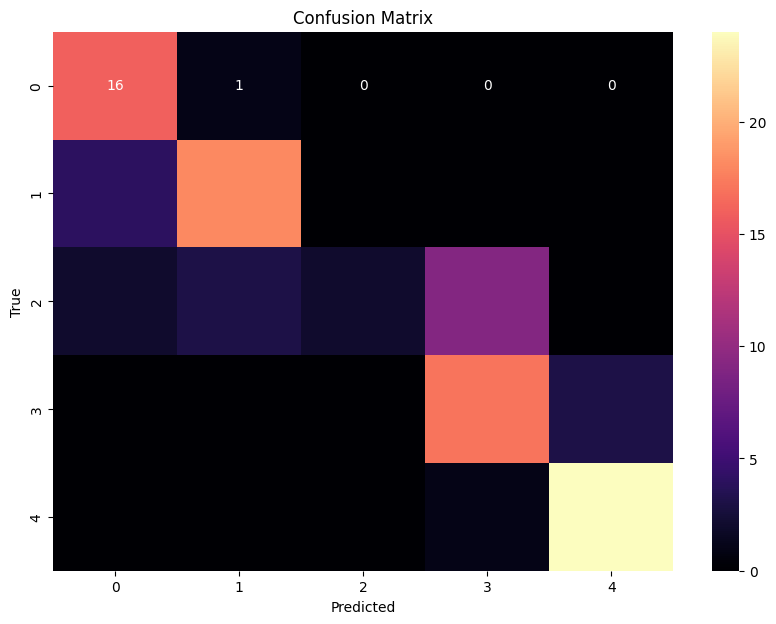

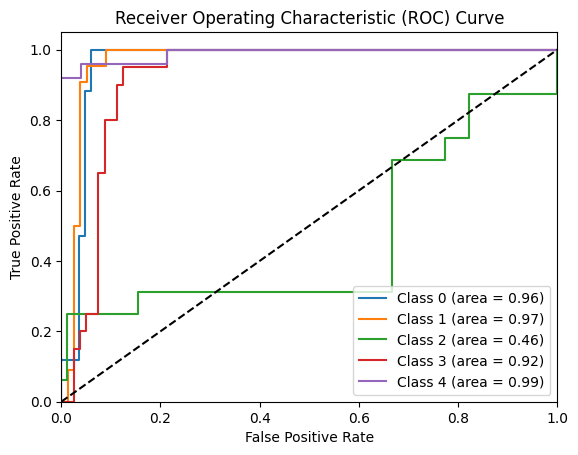

In [26]:
conf(Y_true, Y_pred)

print()

roc_plot(Y2_test, predictions)

In [28]:
NN_1 = NeuralNetwork(inputLayerNeurons = 2, 
                     hiddenLayer1Neurons = 60, 
                     hiddenLayer2Neurons = 60, 
                     hiddenLayer3Neurons = 60, 
                     outLayerNeurons = 5, 
                     learning_rate = 0.001, 
                     activation_type= 'sigmoid')

for i in range(100000):
    NN_1.train(features_train,Y2_train)
    err = np.mean(np.square(Y2_train - NN_1.feedForward(features_train)))

    if i % 10000 == 0:
      err_list.append(err)
      print(f'Epoch: {i}, error: {err}')

Epoch: 0, error: 0.7177055887886556
Epoch: 10000, error: 0.13260479236692765
Epoch: 20000, error: 0.12920415294173468
Epoch: 30000, error: 0.1161673709313439
Epoch: 40000, error: 0.11418946201396062
Epoch: 50000, error: 0.1127690839091066
Epoch: 60000, error: 0.11188112463054074
Epoch: 70000, error: 0.1111396043049929
Epoch: 80000, error: 0.1104694889240628
Epoch: 90000, error: 0.109857844203638


In [29]:
predictions1 = NN_1.feedForward(features_test)

Y_true1 = np.argmax(Y2_test, axis=1)
Y_pred1 = np.argmax(predictions1, axis=1)

Confusion Matrix:
[[15  2  0  0  0]
 [ 9 13  0  0  0]
 [ 0  5  5  6  0]
 [ 0  0  3 17  0]
 [ 0  0  2 23  0]]


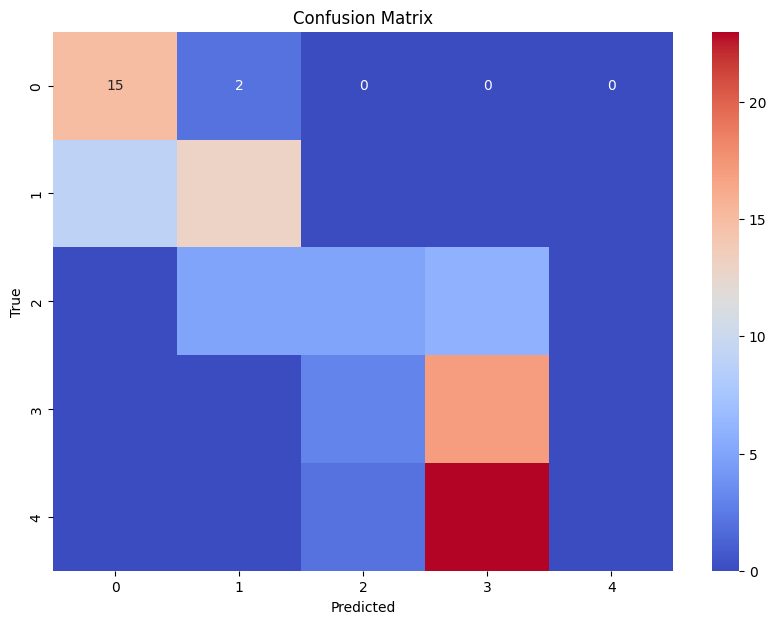

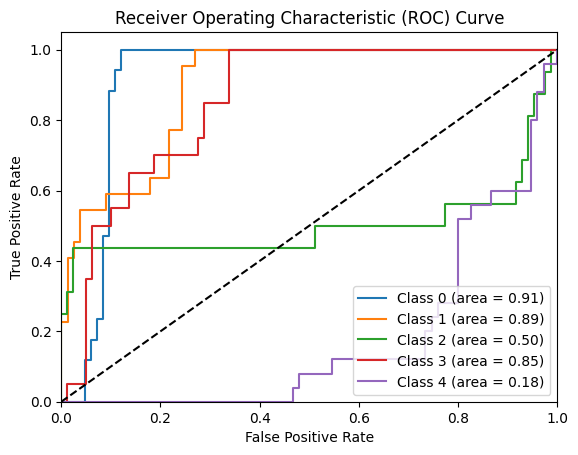

In [30]:
conf(Y_true1, Y_pred1, 'coolwarm')

print()

roc_plot(Y2_test, predictions1)

In [31]:
accuracy = accuracy_score(Y_true1, Y_pred1)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true1, Y_pred1, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true1, Y_pred1, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true1, Y_pred1, average='macro')
print(f"F1 Score overall: {f1}")

Overall Accuracy: 0.5
Precision for each class:
Class 0: 0.625
Class 1: 0.65
Class 2: 0.5
Class 3: 0.3695652173913043
Class 4: 0.0
Recall: 0.5271524064171123
F1 Score overall: 0.45010436717753793


c:\Users\TAHSIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## <b>Conclusion</b>

<p>
In case - 1 where the number of hidden layer neurons were 10 the overall accuracy of the model was <code>77%</code>. However, in case - 2 where the number of hidden layer neurons incresead to 60 the accuracy of the model degraded and it was <code>50%</code>

With a training set of 200 combinations and 100 for testing the Neural Network was able to classify although the accuracy rate was not that much and it varies depending on the dataset. 

In case 1
Overall Accuracy: 0.77
Precision for each class:
Class 0: 0.7272727272727273
Class 1: 0.8181818181818182
Class 2: 1.0
Class 3: 0.6296296296296297
Class 4: 0.8888888888888888
Recall: 0.7388716577540106
F1 Score overall: 0.7014796078625866
Therefore the F1 score was <code>70%</code>

In case 2
Overall Accuracy: 0.5
Precision for each class:
Class 0: 0.625
Class 1: 0.65
Class 2: 0.5
Class 3: 0.3695652173913043
Class 4: 0.0
Recall: 0.5271524064171123
F1 Score overall: 0.45010436717753793
Therefore the F1 score was <code>45%</code>

In both cases the sigmoid activation function performed better than other functions.
</p>